In [12]:
%%capture
%run ch04_linear_algebra.ipynb
%run ch05_statistics.ipynb
%run ch06_probability.ipynb

In [13]:
# 1-D data

from typing import List, Dict
from collections import Counter
import math

import matplotlib.pyplot as plt

def bucketize(point: float, bucket_size: float) -> float:
    """Floor the point to the next lower multiple of bucket size"""
    
    return bucket_size * math.floor(point / bucket_size) # first value of the n-th bucket

def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    """Buckets the points and counts haw many in each bucket"""
    
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)

In [14]:
import random

random.seed(0)

# uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]

# normal distribution with mean  0, standard deviation 57
normal = [57 * inverse_normal_cdf(random.random()) for _ in range(10000)]

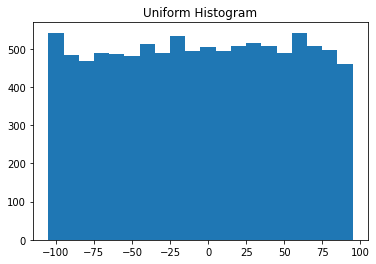

In [15]:
plot_histogram(uniform, 10, "Uniform Histogram")

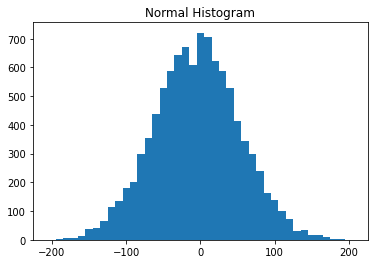

In [16]:
plot_histogram(normal, 10, "Normal Histogram")

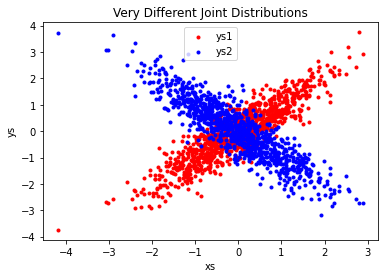

In [17]:
# 2-D data

def random_normal() -> float:
    """Returns a random draw from a standard normal distribution"""
    
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)] # 1000 data points
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

plt.scatter(xs, ys1, marker='.', color='red', label='ys1')
plt.scatter(xs, ys2, marker='.', color='blue', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

In [18]:
print(correlation(xs, ys1)) # positive correlation
print(correlation(xs, ys2)) # negative correlation

0.9010493686379609
-0.8920981526880033


In [19]:
# N-D data

def correlation_matrix(data: List[Vector]) -> Matrix:
    """
    Returns the len(data) x len(data) matrix whose (i, j)-th entry
    is the correlation between data[i] and data[j]
    """
    
    def correlation_ij(i: int, j: int) -> float:
        return corrleation(data[i], data[j])
        
    return make_matrix(len(data), len(data), correlation_ij)

vectors = [xs, ys1, ys2]
correlation_matrix(vectors)
# assert correlation_matrix(vectors) == [
#     [correlation(xs,  xs), correlation(xs,  ys1), correlation(xs,  ys2)],
#     [correlation(ys1, xs), correlation(ys1, ys1), correlation(ys1, ys2)],
#     [correlation(ys2, xs), correlation(ys2, ys1), correlation(ys2, ys2)],
# ]

NameError: name 'corrleation' is not defined

In [ ]:
# Scatterplot matrix

num_vectors = len(vectors)
fig, ax = plt.subplots(num_vectors, num_vectors)

for i in range(num_vectors):
    for j in range(num_vectors):
        
        # Scatter column_j on the x-axis vs. column_i on the y-axis
        if i != j:
            ax[i][j].scatter(vectors[j], vectors[i])
        
        # unless i == j, in which case show the series name
        else:
            ax[i][j].annotate("series" + str(i), (0.5, 0.5), 
                              xycoords='axes fraction', 
                              ha="center", 
                              va="center")
        
        # then hide axis labels except left and bottom charts
        if i < num_vectors - 1: ax[i][j].xaxis.set_visible(False)
        if j > 0: ax[i][j].yaxis.set_visible(False)
            
# Fix the bottom-right and top-left axis lables, 
# which are wrong because their charts only have text in them
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())

plt.show()